# Make demo images

This notebook can be used to generate images containing some fake Personally identifiable information (PII) that will be used in the demo of anonymization pipeline. Names, date of birth and date of exam are randomly generated by some nice libraries ("names" and "radar") and written on the image.

### Imports

In [1]:
import os
import names
import random
import radar
import datetime
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

### Helpers

In [2]:
def generate_birth():
    return radar.random_datetime(
        start = datetime.datetime(year=1940, month=1, day=1),
        stop = datetime.datetime(year=1970, month=12, day=31)
    )
def generate_xray():
    return radar.random_datetime(
        start = datetime.datetime(year=2015, month=1, day=1),
        stop = datetime.datetime(year=2018, month=12, day=31)
    )

### Function: generates random info and create new image

In [3]:
def create_images(src_folder,img_name,dest_folder):
    img = Image.open(src_folder + '/' + img_name)
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype('FreeMono.ttf', 25)
    name = names.get_full_name()
    patient_id = str(random.randint(1000,9999))
    dob = str(generate_birth().date())
    doxray = str(generate_xray().date())
    draw.text((0, img.size[1]-100), 'name:' + name, (255), font=font)
    draw.text((0, img.size[1]-75), 'id:' + patient_id, (255), font=font)
    draw.text((0, img.size[1]-50), 'd.o.b.:' + dob, (255), font=font)
    draw.text((0, img.size[1]-25), 'd.o.xray:' + doxray, (255), font=font)
    img.save(dest_folder + '/demo_' + name + '_' + patient_id + '_' + dob + '_' + doxray + '.jpeg','JPEG')

### Process folder

In [4]:
src_folder = './data/chest_xray/val/PNEUMONIA'
dest_folder = './data/chest_xray/demo_base/PNEUMONIA'
for img_name in os.listdir(src_folder):
    create_images(src_folder,img_name,dest_folder)

### Display images

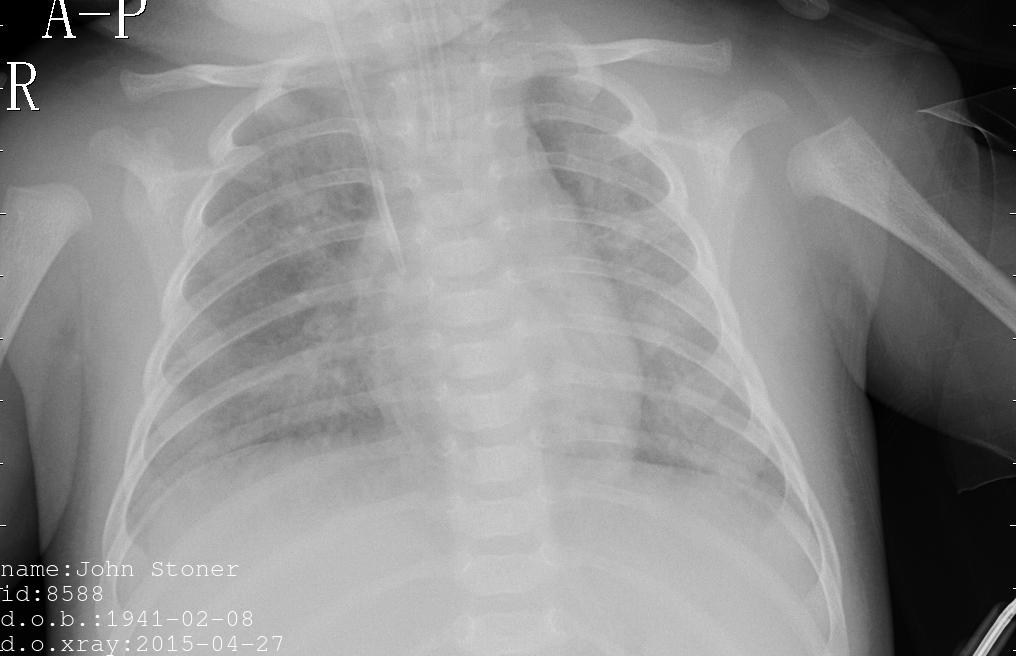

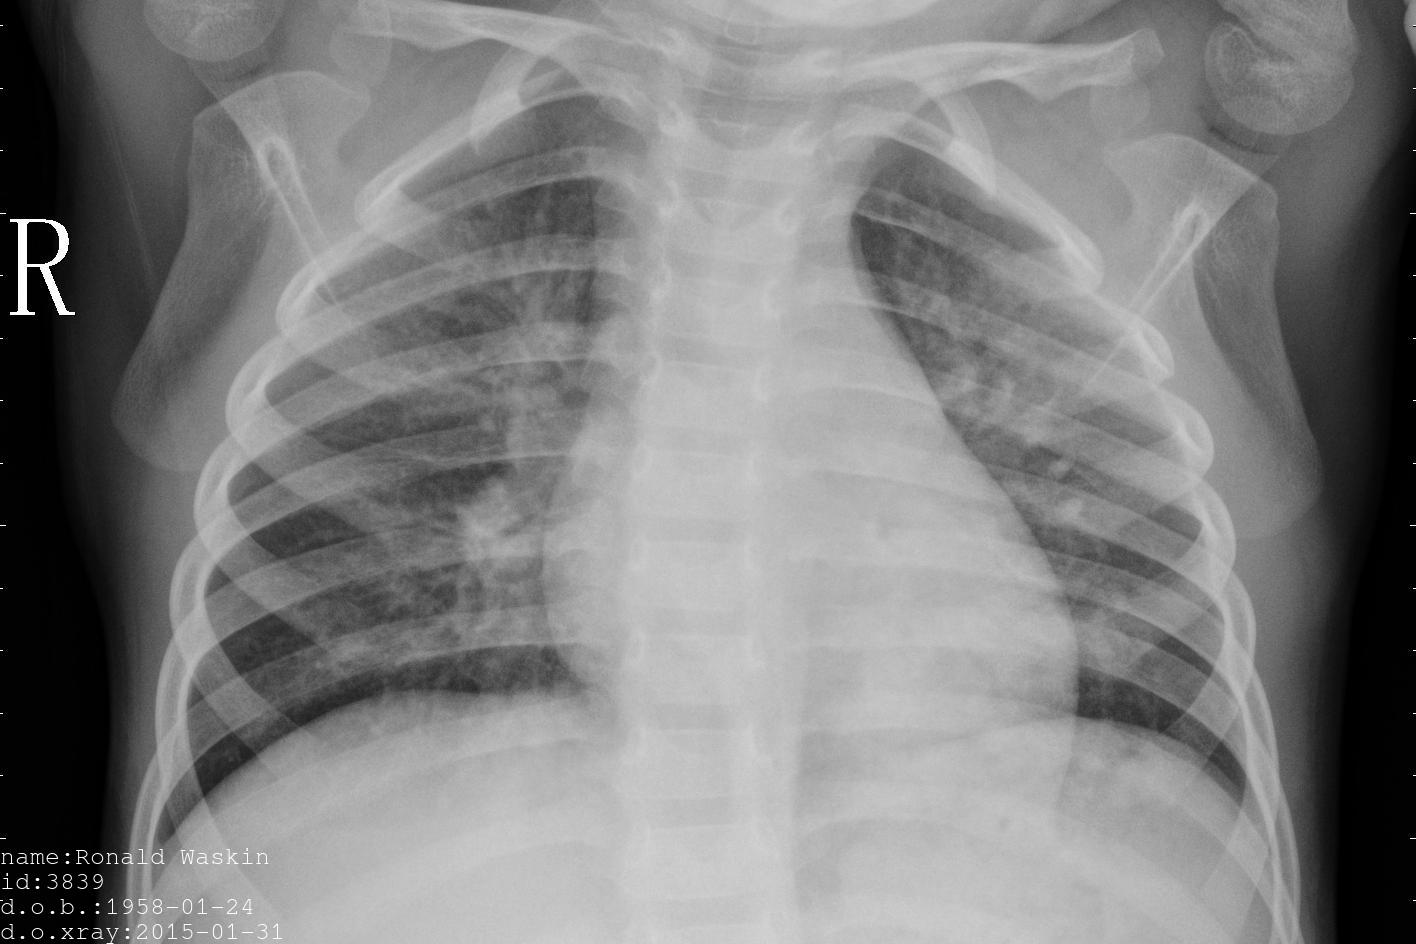

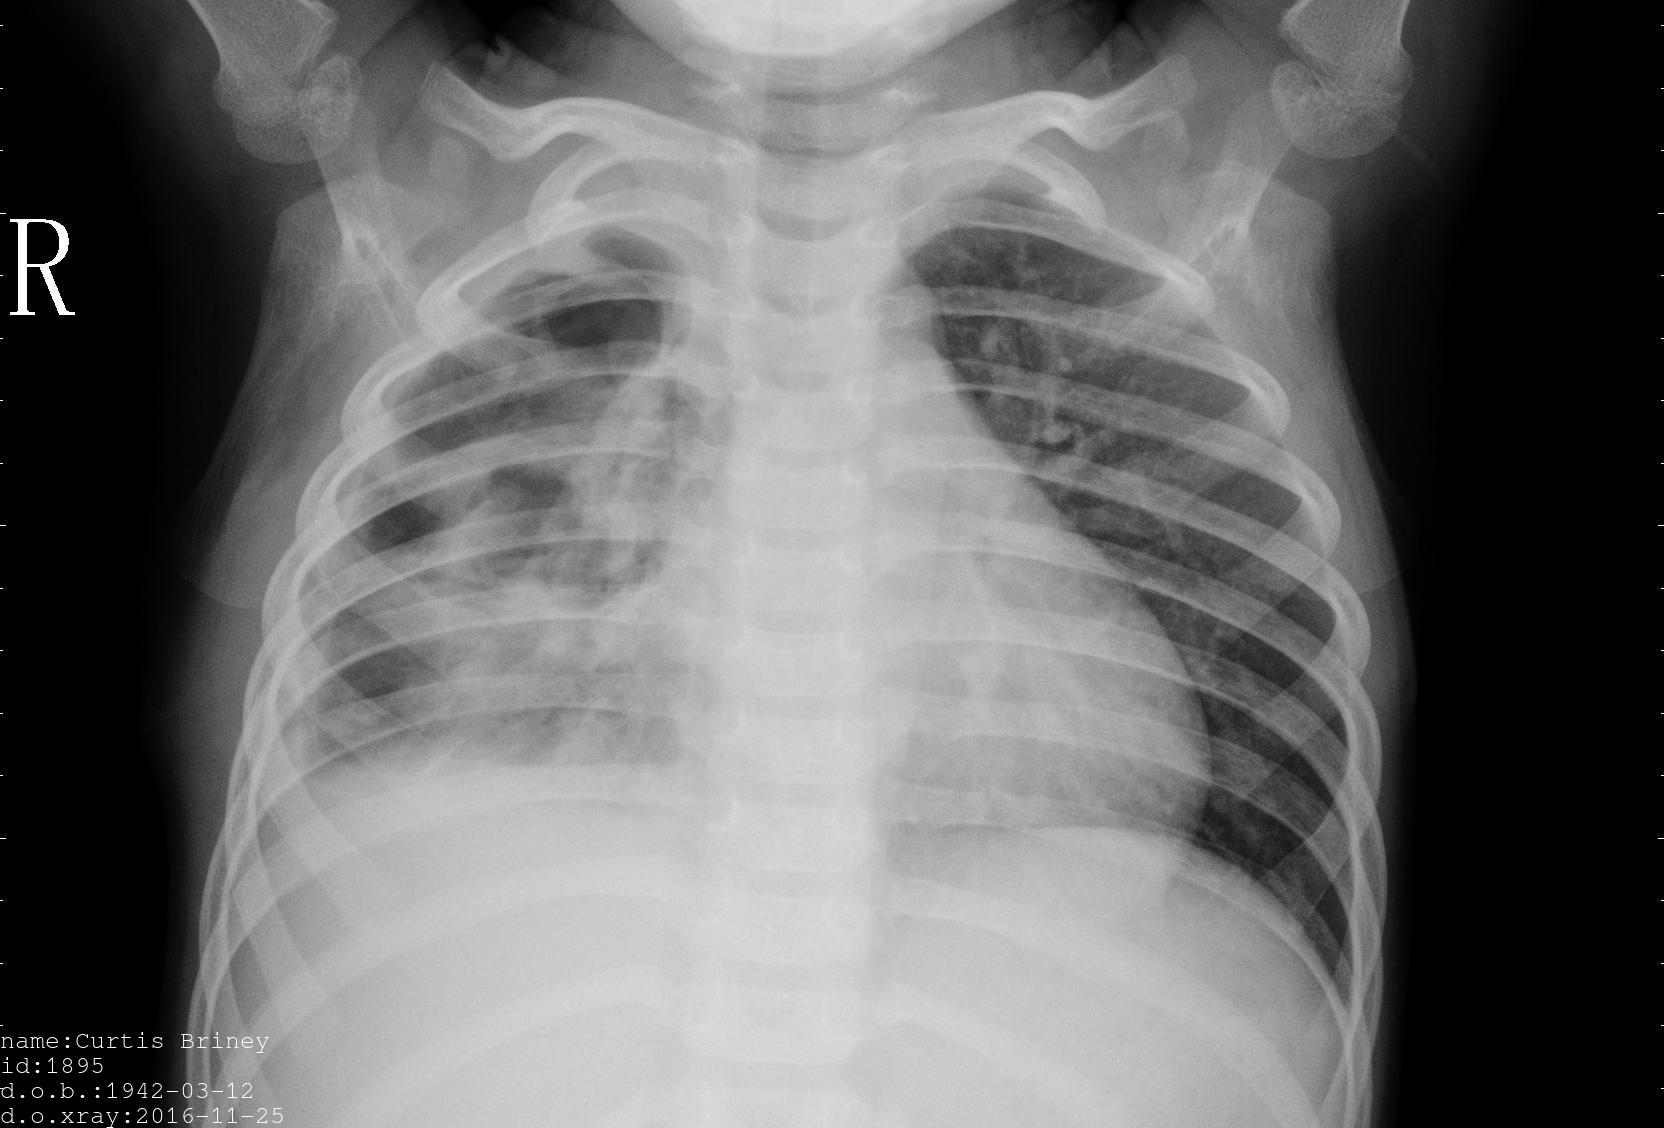

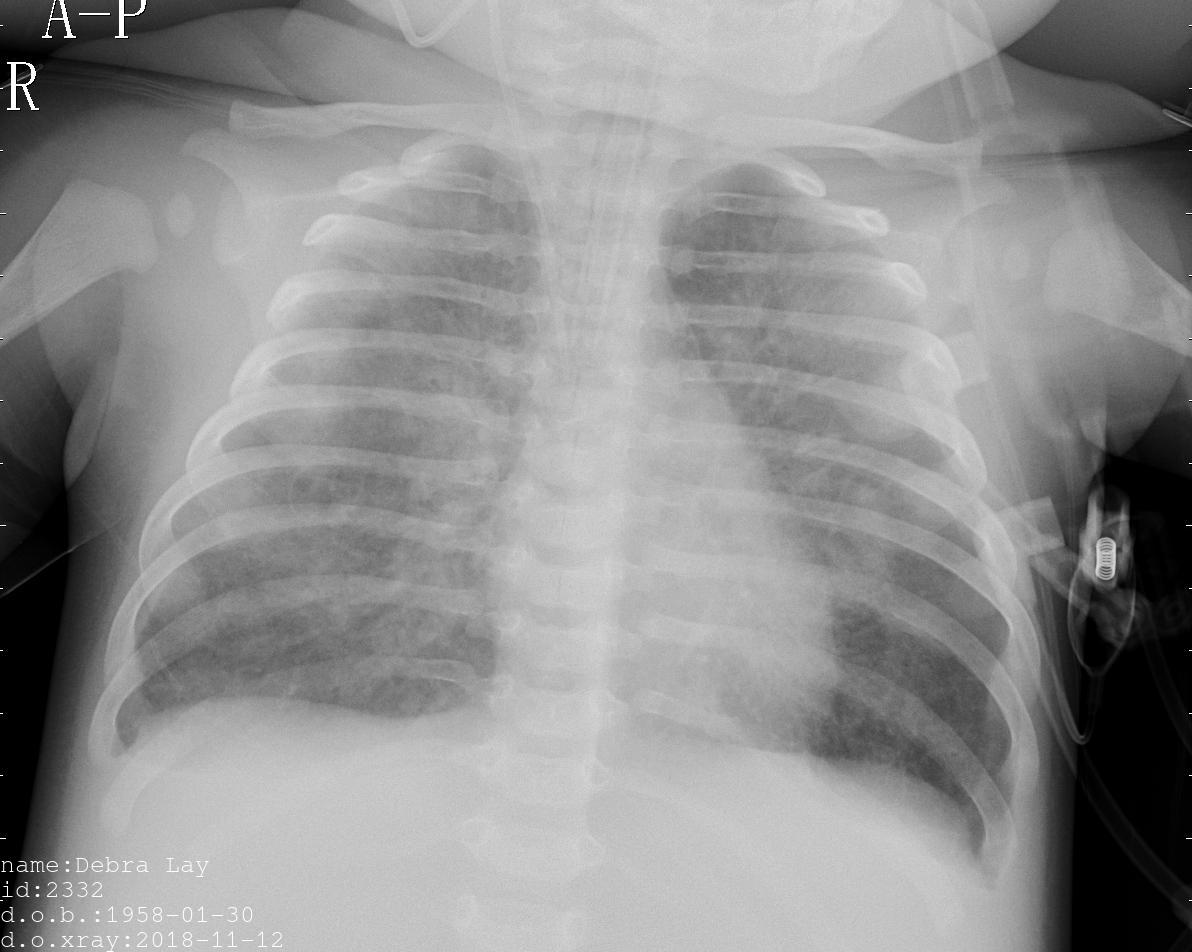

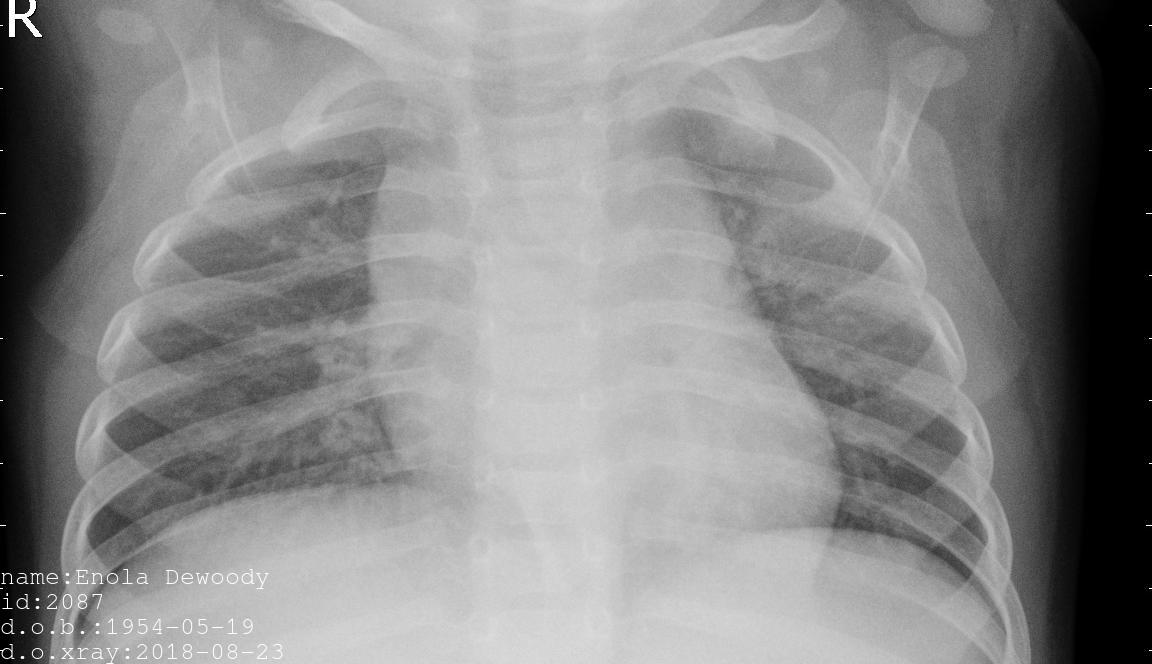

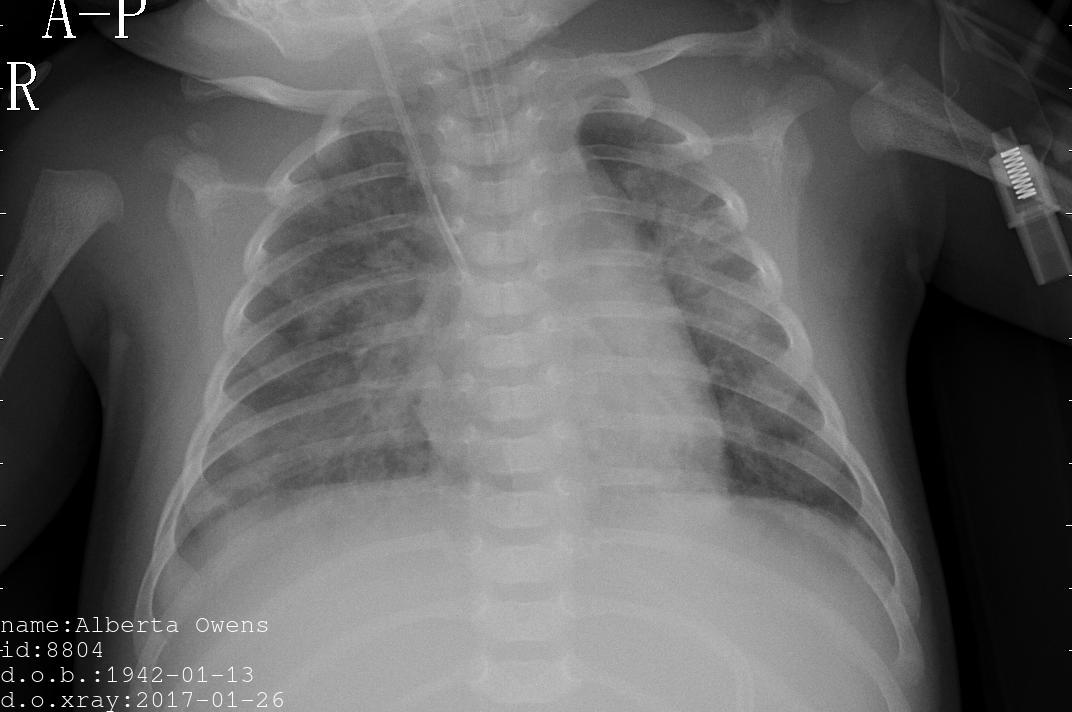

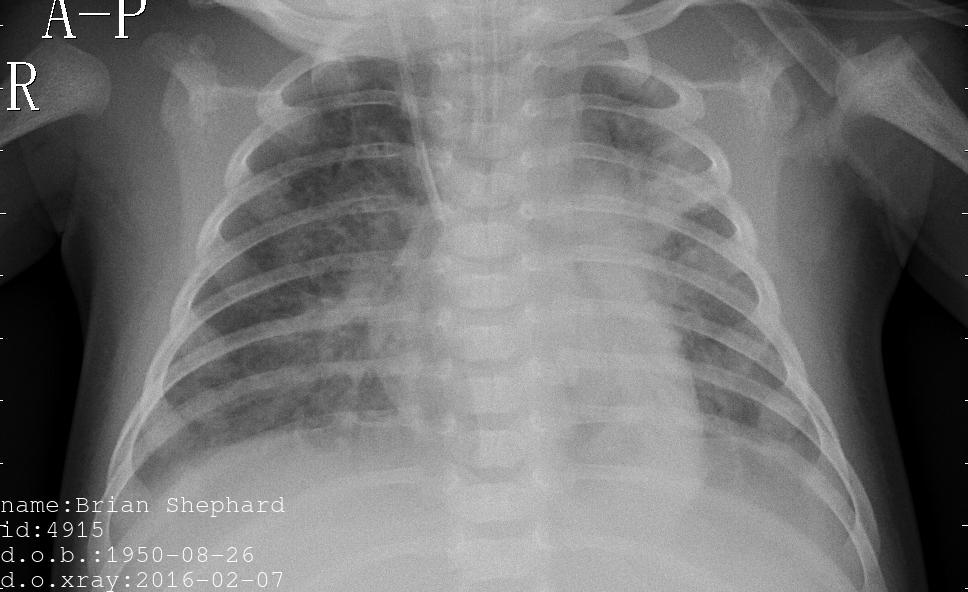

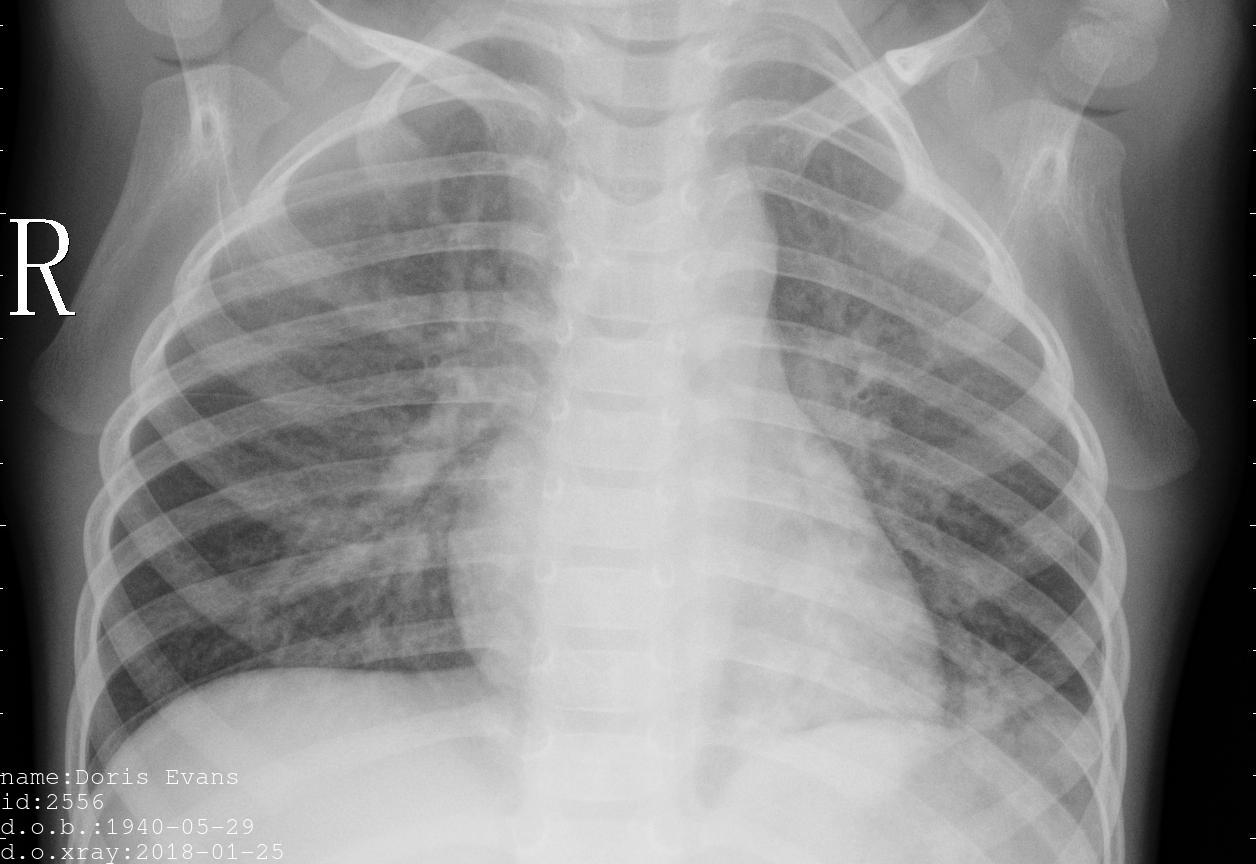

In [5]:
for img in os.listdir('./data/chest_xray/demo_base/PNEUMONIA'):
    img = Image.open('./data/chest_xray/demo_base/PNEUMONIA/' + img)
    display(img)